In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM

In [9]:
rng = np.random.RandomState(42)
X_train = 0.3 * rng.randn(100, 2)
X_train = np.r_[X_train + 2, X_train - 2]
X_outliers = rng.uniform(low=-4, high=4, size=(20, 2))
X= np.vstack((X_train, X_outliers))

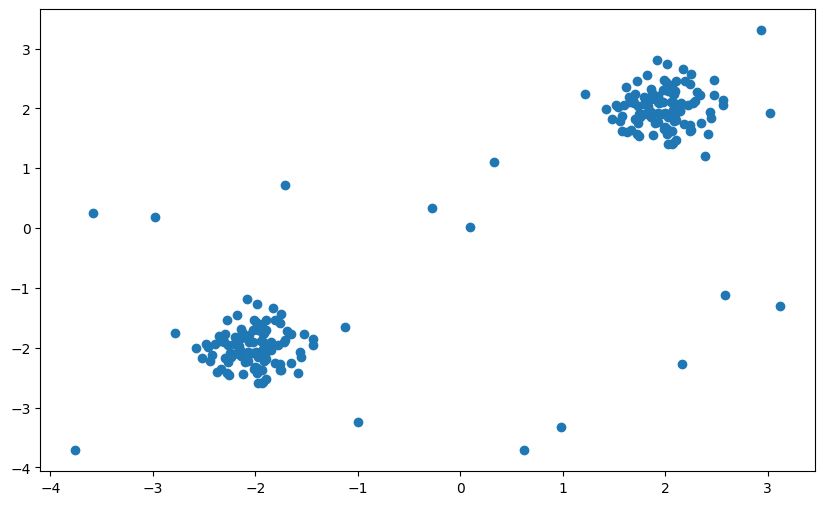

In [10]:
plt.figure(figsize=(10,6))
plt.scatter(X[:, 0], X[:, 1])

In [11]:
clf = OneClassSVM(kernel="rbf", gamma=0.1, nu=0.05)
clf.fit(X_train)

,kernel,'rbf'
,degree,3
,gamma,0.1
,coef0,0.0
,tol,0.001
,nu,0.05
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


In [13]:
y_pred_train = clf.predict(X_train)      # +1 = normal, -1 = anomaly
y_pred_outliers = clf.predict(X_outliers)

In [14]:
print("Normal points predicted as:", np.unique(y_pred_train, return_counts=True))
print("Outliers predicted as:", np.unique(y_pred_outliers, return_counts=True))


Normal points predicted as: (array([-1,  1]), array([ 12, 188]))
Outliers predicted as: (array([-1,  1]), array([18,  2]))


In [16]:
xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

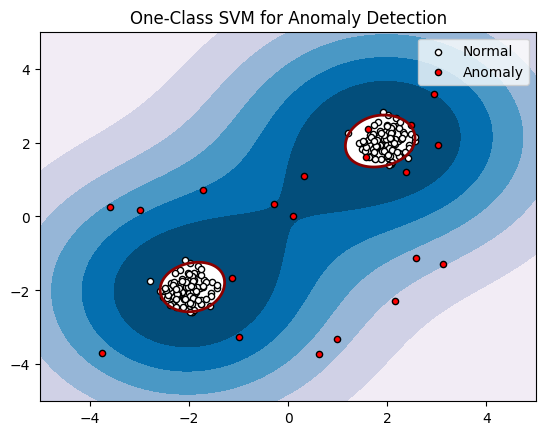

In [17]:
plt.title("One-Class SVM for Anomaly Detection")
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')

plt.scatter(X_train[:, 0], X_train[:, 1], c='white', s=20, edgecolors='k', label="Normal")
plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='red', s=20, edgecolors='k', label="Anomaly")
plt.legend()
plt.show()